In [1]:
from IPython.display import Image

# Redes Bayesianas

## Introdução

Rede bayesiana é um modelo probabilistco representado por grafos direcionados acíclicos, os quais representam um conjunto de variáveis e suas dependências condicionais. As redes bayesianas são comumente usadas quando se deseja representar relação causal entre variáveis aleatórias.  Tais redes são parametrizadas usando a Distribuição de Probabilidade Condicional (Condicional Probability Distributions - CPD). Cada nó na rede é parametrizado usando $P(n| Pai(n))$, com $Pai(n)$ representando o pai do nó na rede.

Considere o exemplo a seguir:

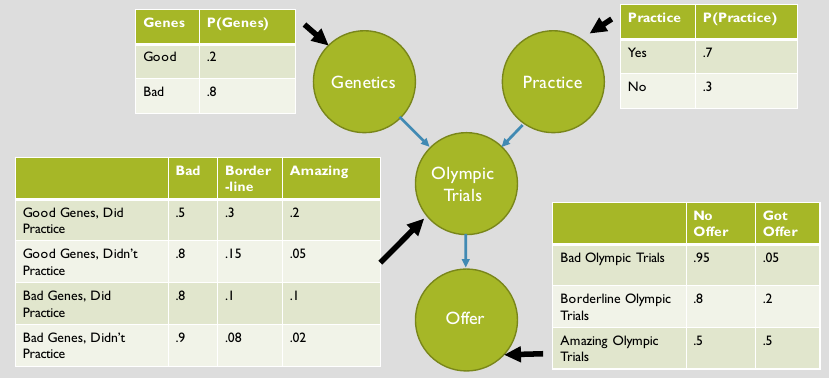

In [2]:
Image(filename='./imagens/alarme.png')

Usaremos o pgmpy para definir a estrutura de rede e criar as tabelas de Distribuição de Probabilidade Condicional de forma separada, em seguida iremos associar sua estrutura. Abaixo está como definir o modelo anterior.

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

#Definicao da estrutura do modelo. Isso sera realizado passando apenas os pares de nos.
model = BayesianModel([('G', 'OT'), ('P', 'OT'), ('OT', 'OF')])

#definicao das tabelas individuais

cpd_g = TabularCPD(variable='G', variable_card=2, values=[[0.2, 0.8]])
cpd_p = TabularCPD(variable='P', variable_card=2, values=[[0.7, 0.3]])
cpd_ot = TabularCPD(variable='OT', variable_card=3, 
                    values=[[0.5, 0.8, 0.8, 0.9], [0.3, 0.15, 0.1, 0.08], [0.2, 0.05, 0.1, 0.02]],
                   evidence=['G', 'P'], evidence_card=[2, 2])
cpd_of = TabularCPD(variable='OF', variable_card=2, values=[[0.95, 0.8, 0.5],[0.05,0.2, 0.5]], 
                    evidence=['OT'], evidence_card=[3])

#Associando CPD ao modelo

model.add_cpds(cpd_g, cpd_p, cpd_ot, cpd_of)
model.check_model()


True

In [6]:
model.get_cpds()

[<TabularCPD representing P(G:2) at 0x1f8bab6e4a8>,
 <TabularCPD representing P(P:2) at 0x1f8bab6e470>,
 <TabularCPD representing P(OT:3 | G:2, P:2) at 0x1f8bab6e4e0>,
 <TabularCPD representing P(OF:2 | OT:3) at 0x1f8bab6e588>]

In [7]:
print(model.get_cpds('G'))

╒═════╤═════╕
│ G_0 │ 0.2 │
├─────┼─────┤
│ G_1 │ 0.8 │
╘═════╧═════╛


In [8]:
model.get_cardinality('G')

2